Milestone4 - Auto Encoders
AMIT PAL

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Healthcare Providers.csv')

In [3]:
df.shape

(100000, 27)

Data Pre-processing
Handling Missing Values

In [4]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [5]:
DropColumns = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider']
df = df.drop(DropColumns, axis=1)

In [6]:
# Filling missing with mode values
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [7]:
df.isnull().sum()

Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average 

In [8]:
# Removing periods '.' if present
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '')

In [9]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [10]:
# Removing 'Zip Code of the Provider' column as it was evenly distributed(Observed during EDA)
df.drop(columns=['Zip Code of the Provider'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [11]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [12]:
# Changing all needeed values to numeric

def RemoveComma(x):
    return str(x).replace(",","")  # Convert to string before replacing comma

numericCols = ['Number of Services', 'Number of Medicare Beneficiaries', 
               'Number of Distinct Medicare Beneficiary/Per Day Services', 
               'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
               'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

df[numericCols] = df[numericCols].applymap(RemoveComma).apply(pd.to_numeric, errors='ignore')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place


Feature Engineering
Ratio of Medicare Payment Amount to Submitted Charge Amount:

In [14]:
# Adding new column as 'Ratio Medicare Payment to Submitted Charge'

# Calculating the ratio
df['Ratio Medicare Payment to Submitted Charge'] = df['Average Medicare Payment Amount'] / df['Average Submitted Charge Amount']
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485


Frequency Encoding

In [5]:
pip install category_encoders


   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------- ----------------------------- 20.5/81.9 kB 640.0 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 761.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ----------------- ---------------------- 102.4/233.9 kB 6.1 MB/s eta 0:00:01
   ----------------------------------- ---- 204.8/233.9 kB 2.5 MB/s eta 0:00:01
   ----------------------------------- ---- 204.8/233.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 3.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.9 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.9 MB 2.9 MB/s eta 0:00:04
  


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import category_encoders as ce
import pandas as pd 
df = pd.read_csv('Healthcare Providers.csv')

# Identify columns to be frequency encoded (assuming all categorical columns)
FEcols = [var for var in df.columns if df[var].dtype == "O"]

# Create a DataFrame for frequency encoding
df_freq_enc = df.copy()

# Performing frequency encoding
for col in FEcols:
    encoder = ce.CountEncoder(cols=[col])
    df_freq_enc[col] = encoder.fit_transform(df[[col]])

# The encoded DataFrame is now stored in df_freq_enc


In [18]:
df_freq_enc.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,1,1,29331,32757,29105,95746,1,2,...,1297,1297,93802,1229,1674,1255,1,1,1,1
1,3354385,1346202256,251,75,2533,32757,29105,95746,3,59363,...,243,243,93802,86,60,81,2,1,3,1
2,3001884,1306820956,2,1030,2566,1330,66641,95746,1,7,...,44,44,93802,1056,3922,1111,1,214,1,1
3,7594822,1770523540,1,2,29331,32874,66641,95746,1,59363,...,460,460,93802,1817,2517,1836,406,232,320,447
4,746159,1073627758,1,356,3879,2478,66641,95746,5,1624,...,732,732,93802,1012,1674,1074,25,781,2,1


Auto Encoders


In [23]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# Convert DataFrame to numpy array
data = df_freq_enc.values

# Define the dimensions of your data
input_dim = data.shape[1] 

# Define the architecture of the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)  # Encoder layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # Decoder layer

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compiling the model
autoencoder.compile(optimizer='adam', loss='mse')  # Using mean squared error loss

# Summary of the model
autoencoder.summary()

# Train the autoencoder on the dataset
autoencoder.fit(data, data, epochs=30, batch_size=64, shuffle=True)

encoder = Model(inputs=input_layer, outputs=encoded)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 27)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,547 (13.86 KB)

 Trainable params: 3,547 (13.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - loss: 96083580962209792.0000
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 95969128673705984.0000
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - loss: 95886467733127168.0000
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - loss: 96144689756897280.0000
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - loss: 96106833915150336.0000
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 96168664264343552.0000
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 96002457619922944.0000
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 96107392260898816.0000
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 96205188666228736.0000
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 96097642685136896.0000
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 96112657890803712.0000
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━

Model: Keras automatically assigns names to models if not explicitly specified. Here, our model name is "functional_1". Input Layer: "input_layer" is an input layer with an input shape of (None, 27). None indicates that the model can accept any batch size, and 20 indicates the number of features or input dimensions. Dense Layer: "dense" is a fully connected (dense) layer with 64 units/neurons, activated by ReLU. "dense_1" is another dense layer that reconstructs the input shape (None, 27) with 27 units/neurons, activated by sigmoid. Parameters: Parameters for "dense": (27 + 1) * 64 = 1,792 (20 input dimensions + 1 bias, multiplied by 64 units). Parameters for "dense_1": (64 + 1) * 27 = 1,300 (64 input dimensions from previous layer + 1 bias, multiplied by 27 units). Total Parameters: There are total 3547 parameters, among which all are trainable. There is no any non-trainable params.



In [24]:

# Train the autoencoder on the dataset
autoencoder.fit(data, data, epochs=30, batch_size=64, shuffle=True)

encoder = Model(inputs=input_layer, outputs=encoded)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 96044926256545792.0000
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 96091389212753920.0000
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 96195387550859264.0000
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 96326049045938176.0000
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - loss: 96053559140810752.0000
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 96011459871375360.0000
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 96163295555223552.0000
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 96183859858636800.0000
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - loss: 96234592012337152.0000
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - loss: 95975974851575808.0000
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - loss: 96265747705102336.0000
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━

In [25]:
# After training, using autoencoder to reconstruct data
reconstructed_data = autoencoder.predict(data)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step


In [27]:
# Calculate reconstruction errors (Using Mean Squared Error)
import numpy as np
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)
reconstruction_errors

array([1.47206386e+17, 7.00883560e+16, 6.34066793e+16, ...,
       1.48871938e+17, 1.32986132e+17, 6.81793820e+16])

In [28]:
# Detecting the anomalies

threshold = np.percentile(reconstruction_errors, 99)
anomalies = reconstruction_errors > threshold
total_anomalies = np.sum(anomalies)
total_anomalies

1000

Number of anomalies detected by autoencoder model using the reconstruction errors: 1000

Visualization

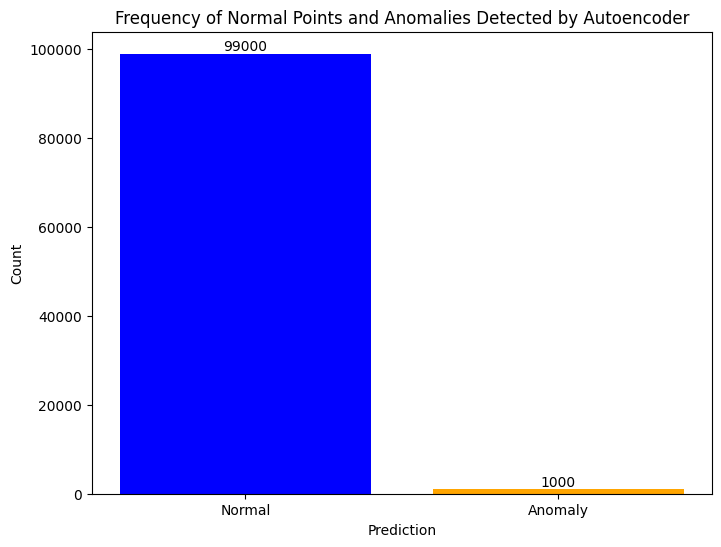

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'reconstruction_errors' and 'anomalies' are already defined

# Calculate the count of normal points and anomalies
normal_count = len(reconstruction_errors) - np.sum(anomalies)
anomaly_count = np.sum(anomalies)

# Plot the bar plot of outliers for the whole dataset
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Anomaly'], [normal_count, anomaly_count], color=['blue', 'orange'])
plt.title('Frequency of Normal Points and Anomalies Detected by Autoencoder')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Adding counts over bars
for i, count in enumerate([normal_count, anomaly_count]):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


Scatter Plots for different columns